In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
train=pd.read_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/train.csv')
test=pd.read_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/sample_submit.csv', header=None)

In [5]:
train.head(10)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
5,12706,23,Private,132652,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,United-States,0
6,7809,44,State-gov,132652,Some-college,10,Divorced,Protective-serv,Unmarried,White,Male,United-States,0
7,12889,19,Private,132652,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,0
8,13121,41,Private,132652,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,United-States,0
9,15731,31,Private,132652,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1


In [6]:
train['fnlwgt'].unique()

array([132652,  24694,  34572])

In [7]:
occupation_counts = train.groupby(['education-num', 'Y']).size().unstack(fill_value=0)
print(occupation_counts)

Y                 0    1
education-num           
3                64    2
4               103   12
5                90    9
6               158   19
7               283   21
8                73    3
9              3400  704
10             2260  571
11              514  118
12              209   97
13             1252  895
14              373  433
15               72  162
16                1    2


In [8]:
education_counts = train.groupby(['relationship', 'Y']).size().unstack(fill_value=0)
print(education_counts)

Y                  0     1
relationship              
Husband         2833  2567
Not-in-family   2360   142
Other-relative   199     4
Own-child       1977    40
Unmarried       1221    28
Wife             262   267


In [9]:
train.drop(['index'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)

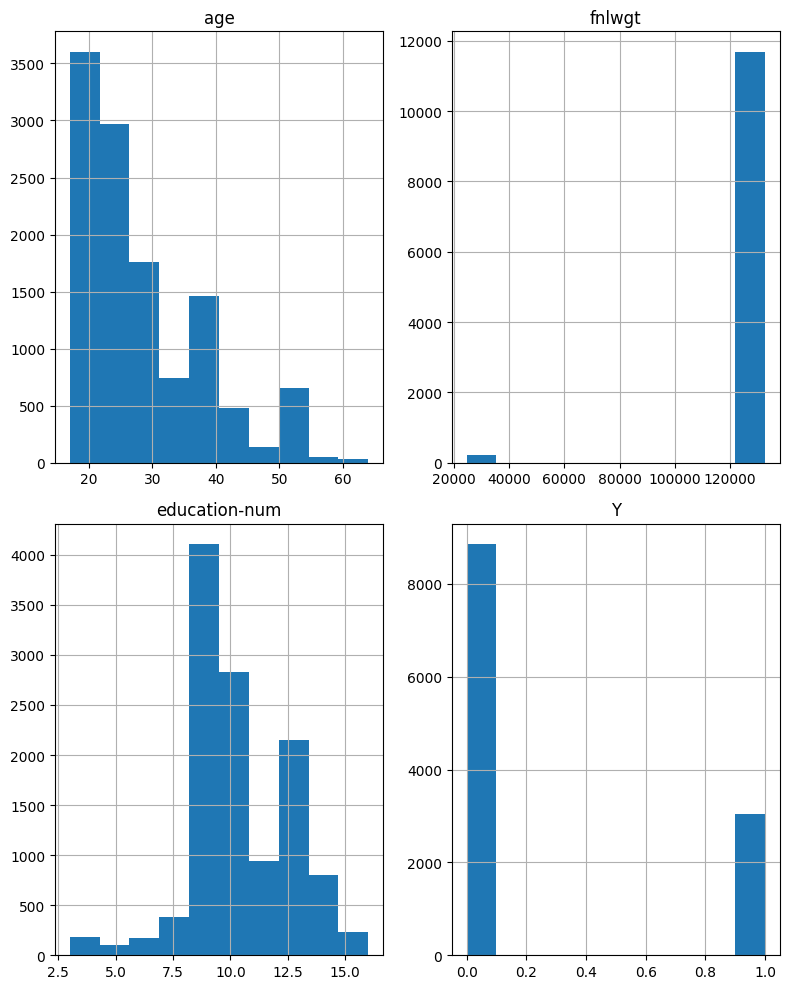

In [10]:
ob_columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
int_columns=['age','fnlwgt','education-num']
df_numeric = train.drop(ob_columns, axis=1)
df_categoric = train[ob_columns]
df_numeric.hist(figsize=(8, 10))
plt.tight_layout()
plt.show()

In [11]:
y=train['Y']
train.drop(['Y'], axis=1, inplace=True)
df = pd.concat((train, test)).reset_index(drop=True)

In [12]:
for column in ob_columns:
  print(df[column].value_counts())

Private             13239
Self-emp-not-inc     1183
Local-gov             837
?                     740
State-gov             426
Self-emp-inc          336
Federal-gov           239
Name: workclass, dtype: int64
HS-grad         5681
Some-college    4024
Bachelors       3195
Masters         1147
Assoc-voc        928
Assoc-acdm       452
11th             441
Prof-school      361
10th             254
7th-8th          175
9th              161
12th             101
5th-6th           79
1st-4th            1
Name: education, dtype: int64
Married-civ-spouse    8619
Never-married         4855
Divorced              2703
Separated              449
Widowed                374
Name: marital-status, dtype: int64
Adm-clerical         2422
Craft-repair         2332
Sales                2226
Prof-specialty       2174
Exec-managerial      2139
Other-service        1322
Machine-op-inspct     917
?                     860
Handlers-cleaners     854
Tech-support          597
Farming-fishing       458
Transpor

In [13]:
dict = {
    '132652':1,  '24694':2,  '34572':3
}
df['fnlwgt'] = df['fnlwgt'].map(lambda x: dict.get(str(x))).astype(str)

In [14]:
#教育
df = df.replace({'occupation': ['?', 'Adm-clerical', 'Handlers-cleaners', 'Other-service', '5th-6th', '7th-8th', '9th', 'HS-grad', 'Preschool']}, 0).astype(str)
df = df.replace({'occupation': ['Craft-repair', 'Farming-fishing', 'Machine-op-inspct', 'Protective-serv', 'Sales','Tech-support','Transport-moving']}, 1).astype(str)
df = df.replace({'occupation': ['Exec-managerial', 'Masters', 'Prof-specialty']}, 2)

# 文字列データを数値に変換しつつ、「dily」の値が近いものをまとめる。
df= df.replace({'native-country':['United-States']}, 0).astype(str)
df= df.replace({'native-country':['Mexico', 'Philippines']}, 1).astype(str)
#職業クラス
df= df.replace({'workclass':['?']}, 0).astype(str)
df= df.replace({'workclass':['Federal-gov', 'Local-gov', 'Self-emp-not-inc','Private','State-gov','Self-emp-not-inc']}, 1).astype(str)
df= df.replace({'workclass':['Self-emp-inc']}, 2).astype(str)

#教育
df = df.replace({'education': ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'HS-grad']}, 0).astype(str)
df = df.replace({'education': ['Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Some-college']}, 1).astype(str)
df = df.replace({'education': ['Masters', 'Prof-school','Prof-school','Prof-school']}, 2).astype(str)

# 配偶者の有無
df = df.replace({'marital-status': ['Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']},0).astype(str)
df = df.replace({'marital-status': ['Married-civ-spouse']}, 1).astype(str)

# 関係
df = df.replace({'relationship': ['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried']}, 0).astype(str)
df = df.replace({'relationship': ['Husband', 'Wife']}, 1).astype(str)

# 人種
df = df.replace({'race': ['Black']}, 0).astype(str)
df = df.replace({'race': ['Asian-Pac-Islander']}, 1).astype(str)
df = df.replace({'race': ['White']}, 2).astype(str)

# 性別
df['sex'] = df['sex'].replace('Female', 0).replace('Male', 1).astype(str)

In [15]:
bins = [0,35,80]
X_cut_age, bin_indice_age = pd.cut(df["age"].astype(int), bins=bins, retbins=True, labels=False)
X_dummies_age = pd.get_dummies(X_cut_age, prefix=X_cut_age.name).astype(str)
df = pd.concat([df, X_dummies_age], axis=1)
bins_2 = [0,3,8,9,10,11,12,13,14,15,16,18]
X_cut_education_num, bin_indice_education_num = pd.cut(df["education-num"].astype(int), bins=bins_2, retbins=True, labels=False)
X_dummies_education_num = pd.get_dummies(X_cut_education_num, prefix=X_cut_education_num.name).astype(str)
df = pd.concat([df, X_dummies_education_num], axis=1)

In [16]:
df.drop(['age','education-num'],axis=1,inplace=True)

In [17]:
train =  df.iloc[:11900]
test = df.iloc[11900:, :]

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
# 多項式・交互作用特徴量
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial_arr = polynomial.fit_transform(df)
all_data = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])

# 組み込み法のモデル、閾値の指定
fs_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

train_polynomial =  all_data[:11900]
test_polynomial = all_data[11900:]
# 特徴量選択の実行
selector.fit(train_polynomial, y)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
train_polynomial_masked = train_polynomial.loc[:, mask]
test_polynomial_masked = test_polynomial.loc[:, mask]

# ランダムフォレストモデルのインスタンスを作成
model = LogisticRegression()


In [20]:
# 予測精度の調節
x_train, x_test, y_train, y_test = train_test_split(train_polynomial_masked, y, test_size = 0.2)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# テストデータの予測を行う
predictions = model.predict(test_polynomial_masked)
y_pred_series = pd.Series(predictions)
result_df = pd.concat([sample.iloc[:, 0],y_pred_series], axis=1)
result_df.to_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/submit.csv', header=False, index=False)

In [22]:
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
print('accuracy_score:', accuracy_score(y_test, y_pred))

accuracy_score: 0.8432773109243697


In [23]:
#本当の結果と予測が異なるものだけ表す
search=pd.concat([x_test, y_test], axis=1)
search['pred']=y_pred
search = search[search['Y'] != search['pred']]
search.head(20)

,poly1,poly3,poly4,poly5,poly6,poly12,poly13,poly15,poly19,poly21,...,poly174,poly182,poly188,poly195,poly207,poly216,poly231,poly249,Y,pred
2172,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
7635,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
8567,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3829,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
5651,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
4490,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
10752,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
11425,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5788,2.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
2265,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
